# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/brianchang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient
api_key = os.getenv("news_api")

In [8]:
# Create a newsapi client
# YOUR CODE HERE!
news_api = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = news_api.get_everything(q = "Bitcoin", language = "en", sort_by = "relevancy")

In [10]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = news_api.get_everything(q = "Ethereum", language = "en", sort_by = "relevancy")

In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for news in bitcoin_news['articles']:
    try:
        text = news['content']
        date = news['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        bitcoin_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'neutral': neu,
            'negative': neg
        })
    except AttributeError:
        passtext = news['content']
        date = news['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        bitcoin_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'neutral': neu,
            'negative': neg
        })
    except AttributeError:
        pass

In [12]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for news in ethereum_news['articles']:
    try:
        text = news['content']
        date = news['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        ethereum_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'neutral': neu,
            'negative': neg
        })
    except AttributeError:
        passtext = news['content']
        date = news['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        ethereum_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'neutral': neu,
            'negative': neg
        })
    except AttributeError:
        pass
        

In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_news_df = pd.DataFrame(bitcoin_sentiments, columns= ["date", "text", "compound", "positive", "negative", "neutral"])
bitcoin_news_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-03,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881
1,2022-08-02,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000
2,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763
3,2022-07-27,"July 27 (Reuters) - Bitcoin rose 6.85% to $22,...",0.0000,0.000,0.000,1.000
4,2022-08-02,Posted \r\nFrom Bitcoin highs to blockchain br...,-0.2960,0.000,0.086,0.914


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_news_df = pd.DataFrame(ethereum_sentiments, columns=["date", "text", "compound", "positive", "negative", "neutral"])
ethereum_news_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763
1,2022-08-04,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.048,0.051,0.901
2,2022-08-02,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827
3,2022-08-11,Developers have picked a number of so-called t...,-0.6124,0.036,0.145,0.820
4,2022-08-08,"BANGKOK, Aug 8 (Reuters) - Crypto exchange Zip...",0.0000,0.000,0.000,1.000


In [15]:
bitcoin_news_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.031627,0.063100,0.055310,0.881600
std,0.455952,0.069054,0.072972,0.088759
min,-0.908100,0.000000,0.000000,0.628000
25%,-0.296000,0.000000,0.000000,0.818000
50%,0.000000,0.057500,0.000000,0.878500
75%,0.361200,0.106000,0.109750,0.954000
max,0.924600,0.372000,0.307000,1.000000


In [16]:
ethereum_news_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.00000,100.000000
mean,0.161733,0.07525,0.03851,0.886290
std,0.441111,0.06941,0.06050,0.083355
min,-0.851900,0.00000,0.00000,0.679000
25%,-0.005425,0.00000,0.00000,0.823500
50%,0.197450,0.06350,0.00000,0.886500
75%,0.534600,0.12950,0.05625,0.943750
max,0.840200,0.24900,0.24300,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a positive mean score of 0.07525, beating Bitcoin's positive mean score of 0.063100.

Q: Which coin had the highest compound score?

A: Bitcoin's highest compound score was 0.924600, beating Ethereum's highest compound score of 0.840200.

Q. Which coin had the highest positive score?

A: Bitcoin's highest positive score was 0.372000, beating Ethereum's highest positive score of 0.24900.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmantizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw= set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'the'}

In [24]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    lem = [lemmantizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [25]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_news_df['tokens'] = bitcoin_news_df['text'].apply(tokenizer)
bitcoin_news_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-08-03,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881,"[wa, 845, morning, june, 13, bill, stewart, ce..."
1,2022-08-02,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000,"[tool, trace, cryptocurrencies, last, several,..."
2,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
3,2022-07-27,"July 27 (Reuters) - Bitcoin rose 6.85% to $22,...",0.0000,0.000,0.000,1.000,"[july, 27, reuters, bitcoin, rose, 685, 227170..."
4,2022-08-02,Posted \r\nFrom Bitcoin highs to blockchain br...,-0.2960,0.000,0.086,0.914,"[posted, bitcoin, high, blockchain, bridge, lo..."


In [26]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_news_df['tokens'] = ethereum_news_df['text'].apply(tokenizer)

ethereum_news_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
1,2022-08-04,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.048,0.051,0.901,"[nonfungible, token, nft, market, ha, fallen, ..."
2,2022-08-02,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827,"[day, week, ending, letter, inevitably, mean, ..."
3,2022-08-11,Developers have picked a number of so-called t...,-0.6124,0.036,0.145,0.820,"[developer, picked, number, socalled, total, t..."
4,2022-08-08,"BANGKOK, Aug 8 (Reuters) - Crypto exchange Zip...",0.0000,0.000,0.000,1.000,"[bangkok, aug, 8, reuters, crypto, exchange, z..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [34]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(bitcoin_news_df)
eth_tokens = get_tokens(ethereum_news_df)

In [35]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_counts = Counter(ngrams(btc_tokens,n=2))
btc_counts

Counter({('wa', '845'): 1,
         ('845', 'morning'): 1,
         ('morning', 'june'): 1,
         ('june', '13'): 1,
         ('13', 'bill'): 1,
         ('bill', 'stewart'): 1,
         ('stewart', 'ceo'): 1,
         ('ceo', 'mainebased'): 1,
         ('mainebased', 'bitcoin'): 1,
         ('bitcoin', 'mining'): 3,
         ('mining', 'business'): 1,
         ('business', 'dynamic'): 1,
         ('dynamic', 'mining'): 1,
         ('mining', 'received'): 1,
         ('received', 'call'): 1,
         ('call', 'one'): 1,
         ('one', 'employee'): 1,
         ('employee', 'like'): 1,
         ('like', 'every'): 1,
         ('every', 'machine'): 1,
         ('machine', 'inside'): 1,
         ('inside', '3472'): 1,
         ('3472', 'char'): 1,
         ('char', 'tool'): 1,
         ('tool', 'trace'): 1,
         ('trace', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'last'): 1,
         ('last', 'several'): 1,
         ('several', 'year'): 1,
         ('year', 'allowed'): 

In [36]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_counts = Counter(ngrams(eth_tokens,n=2))
eth_counts

Counter({('cryptocurrencies', 'often'): 1,
         ('often', 'criticized'): 1,
         ('criticized', 'bad'): 1,
         ('bad', 'planet'): 1,
         ('planet', 'every'): 1,
         ('every', 'year'): 1,
         ('year', 'bitcoin'): 1,
         ('bitcoin', 'mining'): 1,
         ('mining', 'consumes'): 1,
         ('consumes', 'energy'): 1,
         ('energy', 'belgium'): 1,
         ('belgium', 'according'): 1,
         ('according', 'university'): 1,
         ('university', 'cambridge'): 1,
         ('cambridge', 'bitcoin'): 1,
         ('bitcoin', 'electricity'): 1,
         ('electricity', 'consump'): 1,
         ('consump', '3829'): 1,
         ('3829', 'char'): 1,
         ('char', 'nonfungible'): 3,
         ('nonfungible', 'token'): 4,
         ('token', 'nft'): 1,
         ('nft', 'market'): 1,
         ('market', 'ha'): 2,
         ('ha', 'fallen'): 1,
         ('fallen', 'cliff'): 1,
         ('cliff', 'thats'): 1,
         ('thats', 'stopping'): 1,
         ('stoppin

In [37]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [38]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_tokens)

[('char', 100), ('bitcoin', 41), ('reuters', 33)]

In [39]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_tokens)

[('char', 97), ('crypto', 35), ('ethereum', 23)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

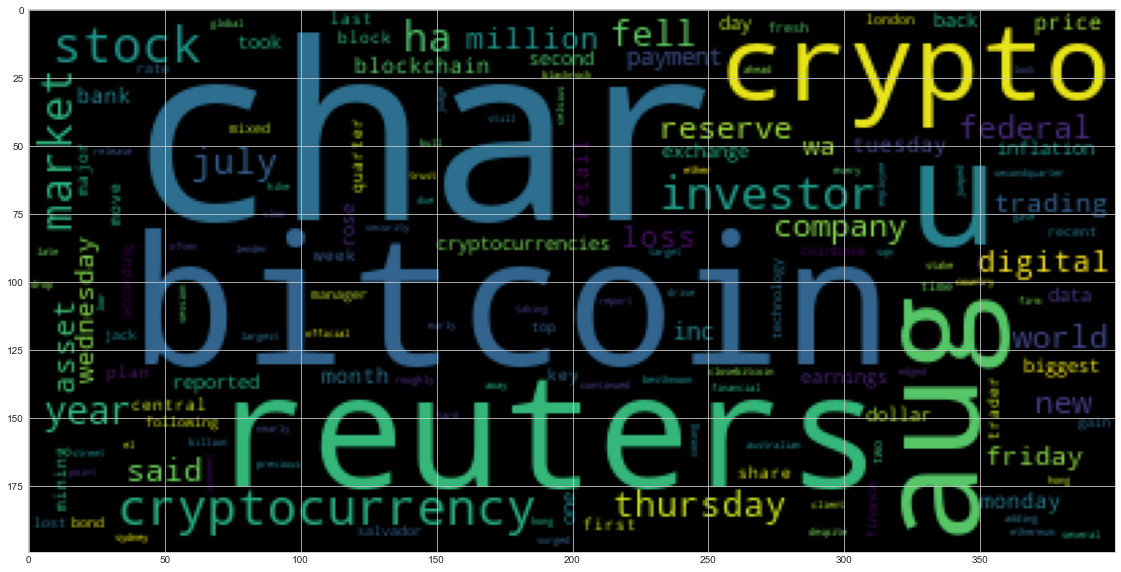

In [44]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(btc_wc)

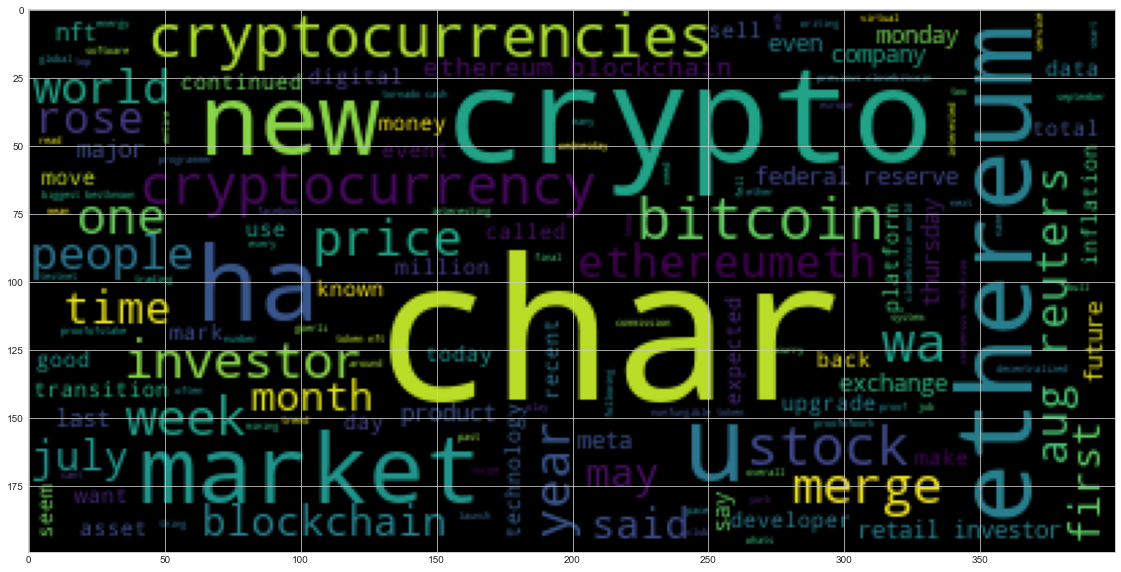

In [45]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [51]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_concat = ' '.join(bitcoin_news_df['text'])

In [52]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_concat)

# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data['title'] = "Bitcoin NER"

In [53]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style='ent')

In [58]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_ner:
    print(ent.text)

It
was
8:45
in
the
morning
of
June
13
when
Bill
Stewart
,
the
CEO
of
Maine
-
based
bitcoin
mining
business
Dynamics
Mining
,
received
a
call
from
one
of
his
employees
.
He
's
like
,
Every
machine
inside
of
…
[
+3472
chars
]
Tools
to
trace
cryptocurrencies
have
,
over
just
the
last
several
years
,
allowed
law
enforcement
agencies
to
convict
dark
web
black
market
administrators
,
recover
millions
in
ransomware
payments
,
seiz
…
[
+3510
chars
]
Cryptocurrencies
are
often
criticized
for
being
bad
for
the
planet
.
Every
year
,
bitcoin
mining
consumes
more
energy
than
Belgium
,
according
to
the
University
of
Cambridges
Bitcoin
Electricity
Consump
…
[
+3829
chars
]
July
27
(
Reuters
)
-
Bitcoin
rose
6.85
%
to
$
22,717.05
at
22:05
GMT
on
Wednesday
,
adding
$
1,457.27
to
its
previous
close
.


Bitcoin
,
the
world
's
biggest
and
best
-
known
cryptocurrency
,
is
up
29.1
%
from
t
…
[
+352
chars
]
Posted


From
Bitcoin
highs
to
blockchain
bridge
lows
,
to
why
some
of
the
worlds
biggest
technology
c

---

### Ethereum NER

In [59]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_concat = ' '.join(ethereum_news_df['text'])

In [60]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(btc_concat)

# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data['title'] = "Ethereum NER"

In [61]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style='ent')

In [62]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_ner:
    print(ent.text)

It
was
8:45
in
the
morning
of
June
13
when
Bill
Stewart
,
the
CEO
of
Maine
-
based
bitcoin
mining
business
Dynamics
Mining
,
received
a
call
from
one
of
his
employees
.
He
's
like
,
Every
machine
inside
of
…
[
+3472
chars
]
Tools
to
trace
cryptocurrencies
have
,
over
just
the
last
several
years
,
allowed
law
enforcement
agencies
to
convict
dark
web
black
market
administrators
,
recover
millions
in
ransomware
payments
,
seiz
…
[
+3510
chars
]
Cryptocurrencies
are
often
criticized
for
being
bad
for
the
planet
.
Every
year
,
bitcoin
mining
consumes
more
energy
than
Belgium
,
according
to
the
University
of
Cambridges
Bitcoin
Electricity
Consump
…
[
+3829
chars
]
July
27
(
Reuters
)
-
Bitcoin
rose
6.85
%
to
$
22,717.05
at
22:05
GMT
on
Wednesday
,
adding
$
1,457.27
to
its
previous
close
.


Bitcoin
,
the
world
's
biggest
and
best
-
known
cryptocurrency
,
is
up
29.1
%
from
t
…
[
+352
chars
]
Posted


From
Bitcoin
highs
to
blockchain
bridge
lows
,
to
why
some
of
the
worlds
biggest
technology
c

---